In [136]:
#Data Cleaning Packages
import pandas as pd
import numpy as np

#Visualization Packages
import matplotlib.pyplot as plt
import seaborn as sns

#Modeling Packages
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_auc_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
import xgboost as xgb

In [137]:
# Upload the data to a dataframe for EDA and cleaning
df = pd.read_csv('miami-housing.csv')

In [138]:
df.head()

,LATITUDE,LONGITUDE,PARCELNO,SALE_PRC,LND_SQFOOT,TOT_LVG_AREA,SPEC_FEAT_VAL,RAIL_DIST,OCEAN_DIST,WATER_DIST,CNTR_DIST,SUBCNTR_DI,HWY_DIST,age,avno60plus,month_sold,structure_quality
0,25.891031,-80.160561,622280070620,440000.0,9375,1753,0,2815.9,12811.4,347.6,42815.3,37742.2,15954.9,67,0,8,4
1,25.891324,-80.153968,622280100460,349000.0,9375,1715,0,4359.1,10648.4,337.8,43504.9,37340.5,18125.0,63,0,9,4
2,25.891334,-80.153740,622280100470,800000.0,9375,2276,49206,4412.9,10574.1,297.1,43530.4,37328.7,18200.5,61,0,2,4
3,25.891765,-80.152657,622280100530,988000.0,12450,2058,10033,4585.0,10156.5,0.0,43797.5,37423.2,18514.4,63,0,9,4
4,25.891825,-80.154639,622280100200,755000.0,12800,1684,16681,4063.4,10836.8,326.6,43599.7,37550.8,17903.4,42,0,7,4


In [139]:
df.columns = ['Lat', 'Lon', 'Parcelno', 'Sale_Price', 'Land_SQFoot', 'Total_SQFoot', 'Spec_Feat_Val', 
             'Rail_Dist', 'Ocean_Dist', 'Water_Dist', 'CNTR_Dist', 'Sub_CNTR_Dist', 'HWY_Dist', 'Age', 
             'AP_Noise', 'Month_Sold', 'Struc_Qual']

In [140]:
#function indicates whether home was sold for greater or less than the median home price of $330k
def Greater_Than(item):
        if item > 1000000:
            return 1
        else:
            return 0

#Create dummy variable for target feature
df['Target'] = df.Sale_Price.apply(Greater_Than)

In [148]:
#Identified median sales price
df.Sale_Price.median()

310000.0

<AxesSubplot:xlabel='Sale_Price', ylabel='Count'>

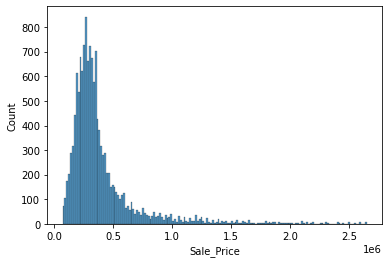

In [145]:
#Visualize sales price distribution in histogram
sns.histplot(df.Sale_Price)

In [104]:
#dropped unecessary variables from set
df = df.drop(columns = ['Parcelno', 'Sale_Price'])

In [105]:
df

,Lat,Lon,Land_SQFoot,Total_SQFoot,Spec_Feat_Val,Rail_Dist,Ocean_Dist,Water_Dist,CNTR_Dist,Sub_CNTR_Dist,HWY_Dist,Age,AP_Noise,Month_Sold,Struc_Qual,Target
0,25.891031,-80.160561,9375,1753,0,2815.9,12811.4,347.6,42815.3,37742.2,15954.9,67,0,8,4,0
1,25.891324,-80.153968,9375,1715,0,4359.1,10648.4,337.8,43504.9,37340.5,18125.0,63,0,9,4,0
2,25.891334,-80.153740,9375,2276,49206,4412.9,10574.1,297.1,43530.4,37328.7,18200.5,61,0,2,4,0
3,25.891765,-80.152657,12450,2058,10033,4585.0,10156.5,0.0,43797.5,37423.2,18514.4,63,0,9,4,0
4,25.891825,-80.154639,12800,1684,16681,4063.4,10836.8,326.6,43599.7,37550.8,17903.4,42,0,7,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13927,25.783130,-80.259795,6780,967,6580,3844.5,20568.0,3252.4,22175.9,12150.1,917.4,16,0,4,4,0
13928,25.783585,-80.260354,7500,1854,2544,3593.6,20791.9,3077.7,22375.1,12316.8,738.2,26,0,5,4,0
13929,25.783793,-80.256126,8460,1271,2064,4143.2,20307.9,3588.4,20966.9,12433.0,743.7,16,0,7,4,0
13930,25.784007,-80.257542,7500,1613,3136,3986.9,20542.6,3589.1,21475.6,12458.0,626.1,16,0,8,4,0


In [106]:
df.columns

Index(['Lat', 'Lon', 'Land_SQFoot', 'Total_SQFoot', 'Spec_Feat_Val',
       'Rail_Dist', 'Ocean_Dist', 'Water_Dist', 'CNTR_Dist', 'Sub_CNTR_Dist',
       'HWY_Dist', 'Age', 'AP_Noise', 'Month_Sold', 'Struc_Qual', 'Target'],
      dtype='object')

In [107]:
#Standardized the feature data with sklearn's StandardScaler
scale = StandardScaler()
X = df.drop(columns = ['Target'])
scaled_X = pd.DataFrame(scale.fit_transform(X), columns = ['Lat', 'Lon', 'Land_SQFoot', 'Total_SQFoot', 'Spec_Feat_Val',
       'Rail_Dist', 'Ocean_Dist', 'Water_Dist', 'CNTR_Dist', 'Sub_CNTR_Dist',
       'HWY_Dist', 'Age', 'AP_Noise', 'Month_Sold', 'Struc_Qual'])

#Splitting Data between Train, Validation, and Test
y = df.Target
X, X_test, y, y_test = train_test_split(X, y, 
                                       test_size=.2,     
                                       random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X, y, 
                                       test_size=.25,     
                                       random_state=42)

In [108]:
#KNN Model for All Features
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_val)
print('Precision Score: ', precision_score(y_val, y_pred))
print('Recall Score: ', recall_score(y_val, y_pred))
print('F1 Score: ', f1_score(y_val, y_pred))

Precision Score:  0.7709923664122137
Recall Score:  0.6778523489932886
F1 Score:  0.7214285714285715


In [109]:
#Log Reg Model for All Features
lr_model = LogisticRegression()
lr_model.fit(X_train,y_train)
y_pred = lr_model.predict(X_val)
print('Precision Score: ', precision_score(y_val, y_pred))
print('Recall Score: ', recall_score(y_val, y_pred))
print('F1 Score: ', f1_score(y_val, y_pred))

Precision Score:  0.7876106194690266
Recall Score:  0.5973154362416108
F1 Score:  0.6793893129770993


/Users/averypeterson/opt/anaconda3/envs/classification/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [110]:
#Feature Coefficients for Log Reg model
coef_list = list(lr_model.coef_[0])
for num in range(len(coef_list)):
    print(X_train.columns[num],': ', coef_list[num])

Lat :  -0.013274447568657618
Lon :  0.04136200091609009
Land_SQFoot :  5.407686370795363e-05
Total_SQFoot :  0.0021014514865814633
Spec_Feat_Val :  3.7826741352274064e-05
Rail_Dist :  7.005765369135664e-05
Ocean_Dist :  -2.6542326785428705e-05
Water_Dist :  -5.3485857342700306e-05
CNTR_Dist :  -0.00012504242785305728
Sub_CNTR_Dist :  1.651915653422117e-05
HWY_Dist :  0.00010193552286443841
Age :  -0.04052306280212702
AP_Noise :  -3.425049779357226e-05
Month_Sold :  -0.0039347573773639
Struc_Qual :  -0.0008911777056660823


In [111]:
#Random Forest Model for All Features
randomforest_model = RandomForestClassifier(n_estimators=100)
randomforest_model.fit(X_train,y_train)
y_pred = randomforest_model.predict(X_val)
print('Precision Score: ', precision_score(y_val, y_pred))
print('Recall Score: ', recall_score(y_val, y_pred))
print('F1 Score: ', f1_score(y_val, y_pred))

Precision Score:  0.8692307692307693
Recall Score:  0.7583892617449665
F1 Score:  0.8100358422939069


In [167]:
greater_1Mill = int(df.Target[df.Target == 1].count())
lesser_1Mill = int(df.Target[df.Target == 0].count())
print("The target minority represents",round((greater_1Mill / (greater_1Mill + lesser_1Mill))*100, 2), 'percent')

The target minority represents 5.12 percent


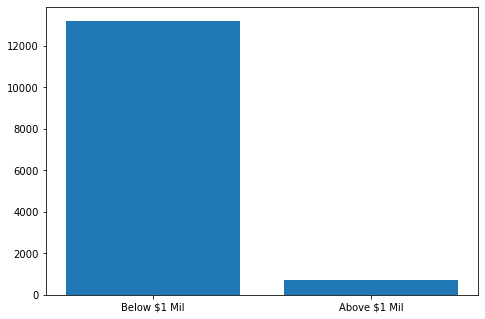

In [113]:
x = ['Below $1 Mil','Above $1 Mil']
height = [df.Target[df.Target == 0].count(), df.Target[df.Target == 1].count()]

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(x,height)

plt.show()

In [114]:
#Clearly our target data is very unbalanced, so we're going to upsample the data to correct this imbalance

import imblearn.over_sampling
n_pos = np.sum(y_train == 1)
n_neg = np.sum(y_train == 0)

# create 3x as many positive samples
ratio = {1 : n_pos * 3, 0 : n_neg}

# randomly oversample positives and create a resampled training set
ROS = imblearn.over_sampling.RandomOverSampler(
                   sampling_strategy = ratio,
                   random_state=42)
X_train_rs, y_train_rs = ROS.fit_resample(X_train, y_train)

In [170]:
lesser_1Mill_rs = y_train_rs.value_counts()[0]
greater_1Mill_rs = y_train_rs.value_counts()[1]
greater_1Mill_rs / (greater_1Mill_rs + lesser_1Mill_rs)
print("The target minority represents",round((greater_1Mill_rs / (greater_1Mill_rs + lesser_1Mill_rs))*100, 2), 'percent')

The target minority represents 13.55 percent


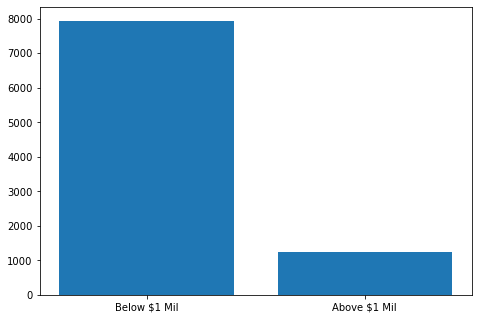

In [116]:
# Below you can see the data has been rebalanced
x = ['Below $1 Mil','Above $1 Mil']
height = [y_train_rs.value_counts()[0], y_train_rs.value_counts()[1]]

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(x,height)

plt.show()

In [117]:
# KNN Model for All Features Resampled Data
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_rs, y_train_rs)
y_pred = knn.predict(X_test)
print('Precision Score: ', precision_score(y_test, y_pred))
print('Recall Score: ', recall_score(y_test, y_pred))
print('F1 Score: ', f1_score(y_test, y_pred))

Precision Score:  0.6444444444444445
Recall Score:  0.7733333333333333
F1 Score:  0.7030303030303031


In [118]:
#Log Reg Model for All Features Resampled Data
lr_model = LogisticRegression()
lr_model.fit(X_train_rs,y_train_rs)
y_pred = lr_model.predict(X_test)
print('Precision Score: ', precision_score(y_test, y_pred))
print('Recall Score: ', recall_score(y_test, y_pred))
print('F1 Score: ', f1_score(y_test, y_pred))

Precision Score:  0.6224489795918368
Recall Score:  0.8133333333333334
F1 Score:  0.7052023121387283


/Users/averypeterson/opt/anaconda3/envs/classification/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [119]:
#Feature Coefficients for Resampled Data
coef_list = list(lr_model.coef_[0])
for num in range(len(coef_list)):
    print(X_train.columns[num],': ', coef_list[num])

Lat :  -0.012276898504124091
Lon :  0.038245823463572554
Land_SQFoot :  7.040536658369266e-05
Total_SQFoot :  0.002356117758956514
Spec_Feat_Val :  3.7581830216329235e-05
Rail_Dist :  7.057854621104497e-05
Ocean_Dist :  -3.127333409912914e-05
Water_Dist :  -5.8870445101452613e-05
CNTR_Dist :  -0.0001305127755400271
Sub_CNTR_Dist :  2.628500841604168e-05
HWY_Dist :  0.00010235406836264755
Age :  -0.03923531327693297
AP_Noise :  -3.723713990656457e-05
Month_Sold :  -0.0040323117807400805
Struc_Qual :  -0.0007106583317686656


In [120]:
#Random Forest for Resampled data
randomforest_model = RandomForestClassifier(n_estimators=221,
                                           max_depth = 22,
                                           random_state = 42,
                                           min_samples_split=2,
                                           max_leaf_nodes = None,
                                           min_samples_leaf = 1,
                                           max_samples = 942,
                                           max_features = 1)
randomforest_model.fit(X_train_rs,y_train_rs)
y_pred = randomforest_model.predict(X_val)
print('Precision Score: ', precision_score(y_val, y_pred))
print('Recall Score: ', recall_score(y_val, y_pred))
print('F1 Score: ', f1_score(y_val, y_pred))

Precision Score:  0.7834394904458599
Recall Score:  0.825503355704698
F1 Score:  0.8039215686274511


In [122]:
# Clearly the random forest model had the highest performance. Let's identify the most significant features
# Done with feature_importances_

feat_imp_df1 = pd.DataFrame(randomforest_model.feature_importances_, 
                           index = X_train.columns, 
                           columns = ['Column']).sort_values(by = 'Column', ascending = True)

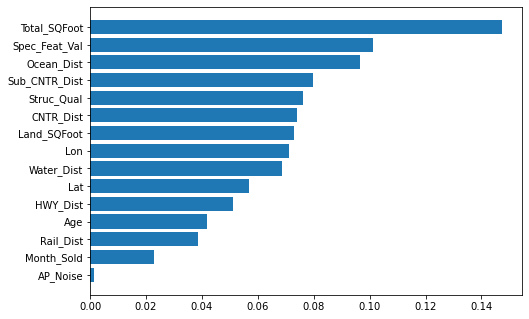

In [124]:
feature_names = feat_imp_df1.index
importance = feat_imp_df1.Column

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.barh(feature_names,importance)

plt.show()

In [125]:
# Done with premutation_importance

result = permutation_importance(randomforest_model, X_val, y_val, n_repeats=10,random_state=0)

In [126]:
feat_imp_df2 = pd.DataFrame(result.importances_mean, 
                           index = X_train.columns, 
                           columns = ['Column']).sort_values(by = 'Column', ascending = True)

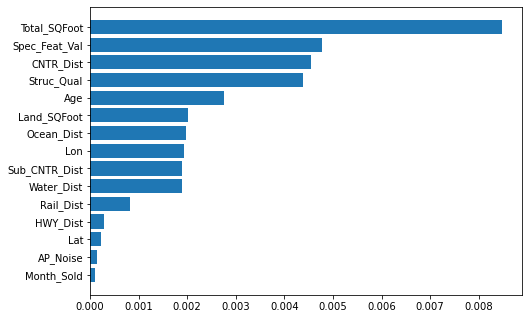

In [127]:
feature_names = feat_imp_df2.index
importance = feat_imp_df2.Column

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.barh(feature_names,importance)

plt.show()

In [128]:
#Based on the feature importance models, rail distance, airplane noise, latitude, and month sold are not significant predictors
#Also removed Longitude as this represents the same measure as distance from the ocean
#Will create a new model without those features

X_train_rs = X_train_rs.drop(columns = ['Rail_Dist', 'AP_Noise', 'Month_Sold', 'Lat', 'Lon'])

X_val = X_val.drop(columns = ['Rail_Dist', 'AP_Noise', 'Month_Sold', 'Lat', 'Lon'])

X_test = X_test.drop(columns = ['Rail_Dist', 'AP_Noise', 'Month_Sold', 'Lat', 'Lon'])

In [129]:
#Random Forest for Resampled data
randomforest_model = RandomForestClassifier(n_estimators=221,
                                           max_depth = 22,
                                           random_state = 42,
                                           min_samples_split=2,
                                           max_leaf_nodes = None,
                                           min_samples_leaf = 1,
                                           max_samples = 942,
                                           max_features = 1)
randomforest_model.fit(X_train_rs,y_train_rs)
y_pred = randomforest_model.predict(X_val)
print('Precision Score: ', precision_score(y_val, y_pred))
print('Recall Score: ', recall_score(y_val, y_pred))
print('F1 Score: ', f1_score(y_val, y_pred))

Precision Score:  0.8095238095238095
Recall Score:  0.7986577181208053
F1 Score:  0.8040540540540542


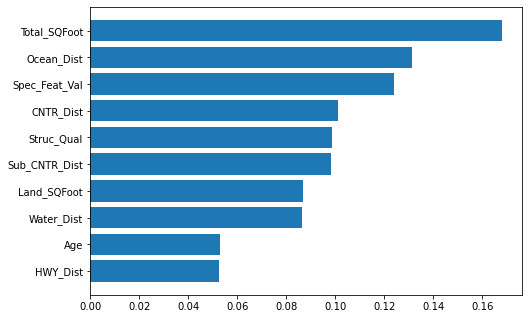

In [131]:
feat_imp_df1 = pd.DataFrame(randomforest_model.feature_importances_, 
                           index = X_test.columns, 
                           columns = ['Column']).sort_values(by = 'Column', ascending = True)

feature_names = feat_imp_df1.index
importance = feat_imp_df1.Column

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.barh(feature_names,importance)

plt.show()

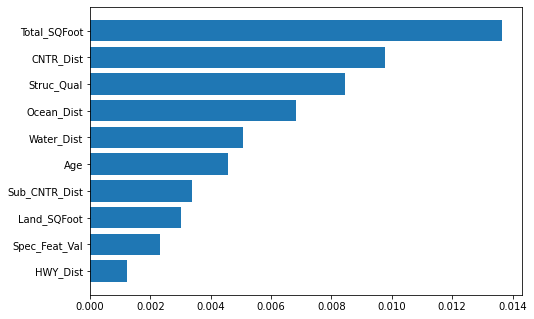

In [132]:
result = permutation_importance(randomforest_model, X_test, y_test, n_repeats=10,random_state=0)

feat_imp_df2 = pd.DataFrame(result.importances_mean, 
                           index = X_test.columns, 
                           columns = ['Column']).sort_values(by = 'Column', ascending = True)

feature_names = feat_imp_df2.index
importance = feat_imp_df2.Column

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.barh(feature_names,importance)

plt.show()

In [133]:
#Final Model Evaluation on Test Set
randomforest_model = RandomForestClassifier(n_estimators=221,
                                           max_depth = 22,
                                           random_state = 42,
                                           min_samples_split=2,
                                           max_leaf_nodes = None,
                                           min_samples_leaf = 1,
                                           max_samples = 942,
                                           max_features = 1)
randomforest_model.fit(X_train_rs,y_train_rs)
y_pred = randomforest_model.predict(X_test)
print('Precision Score: ', precision_score(y_test, y_pred))
print('Recall Score: ', recall_score(y_test, y_pred))
print('F1 Score: ', f1_score(y_test, y_pred))

Precision Score:  0.8356164383561644
Recall Score:  0.8133333333333334
F1 Score:  0.8243243243243243
